In [11]:
# !cp ./drive/MyDrive/Desktop.zip .
# !unzip Desktop.zip
import pickle

# !cp ./drive/MyDrive/xy.pkl .
with open('xy.pkl','rb') as file:
  X,yr = pickle.load(file)

!ls -ltrh

total 1.2G
drwxr-xr-x 1 root root 4.0K Jul 16 13:20 sample_data
drwx------ 5 root root 4.0K Jul 25 14:09 drive
-rw------- 1 root root 1.2G Jul 25 14:55 xy.pkl


In [12]:
import pandas as pd
from sklearn.linear_model import *

from xgboost import XGBRegressor, XGBClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import *
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.tree import *
# training_data = pd.read_csv("training_data.csv").set_index('id')
# # # #tournament_data = pd . read_csv ( 'tournament_data.csv' ) .set_index ('id')
# X,y = training_data [ feature_names ] , training_data['target']
# Xt = tournament_data [ feature_names]
# with open('xy.pkl','wb') as file:
#   pickle.dump([X,y],file)

In [13]:
def performance(mdlr,mdlc, X,yr,yc):
  pr = mdlr.predict(X)
  pc = mdlc.predict(X)
  pc = le.inverse_transform(pc)
  ar = mean_absolute_error(yr,pr)
  ac = mean_absolute_error(yr,pc)
  return ar, ac

import numpy as np

def rounder(values):
    def f(x):
        idx = np.argmin(np.abs(values - x))
        return values[idx]
    return np.frompyfunc(f, 1, 1)



In [14]:
feature_names = [f for f in X.columns if "feature" in f]


le = preprocessing.LabelEncoder()
le.fit(yr)
yc = le.transform(yr)

from sklearn.utils import resample
X, yr, yc = resample(X, yr, yc,replace=False, n_samples=20000,random_state=0)
X


X_train, X_test, yr_train, yr_test, yc_train, yc_test = train_test_split(X, yr, yc, test_size=0.25, random_state=42, stratify=yr)


min_class = yr.value_counts().min()

NewDataX = np.zeros((1,len(feature_names)))
NewDataY = []
for c in [0, .25,.5,.75, 1]:
  indices = yr[yr==c].sample(min_class).index
  rows = X[X.index.isin(indices)]
  NewDataX = np.vstack((NewDataX,rows.to_numpy()))
  NewDataY.extend([c]*min_class)

NewDataX = NewDataX[1:]
NewDataY = np.array(NewDataY)

yc2 = le.transform(NewDataY)

X_train2, X_test2, yr_train2, yr_test2, yc_train2, yc_test2 = train_test_split(NewDataX, NewDataY, yc2, test_size=0.3, random_state=42)

In [15]:
X_train.shape, yr_test.shape

((15000, 310), (5000,))

In [ ]:
# kwargs = dict(max_depth =3 , learning_rate =0.01 ,n_estimators =2 , colsample_bytree=0.5)
# model = XGBClassifier (**kwargs)
# model.fit(X_train,yc_train)

# model = XGBRegressor (**kwargs)
# model.fit(X_train,yr_train)

# kwargs = dict()
# model = make_pipeline(SGDClassifier(class_weight='balanced',**kwargs))
# model.fit(X_train,yc_train)

# model = make_pipeline(SGDRegressor(**kwargs))
# model.fit(X_train,yr_train)

# model = make_pipeline(LogisticRegression(class_weight='balanced'))
# model.fit(X_train,yc_train)

# model = make_pipeline(LinearRegression())
# model.fit(X_train,yr_train)



Pipeline(memory=None,
         steps=[('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
p = model.predict(X_test)
p2 = rounder(np.array([0,.25,.5,.75,1]))(p)
# p = le.inverse_transform(p)
mean_absolute_error(yr_test,p), mean_absolute_error(yr_test,p2)

(0.15431995571734253, 0.14954125880814972)

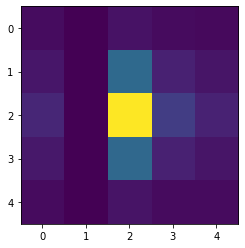

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.imshow(confusion_matrix(yc_test, p))

In [ ]:
pd.DataFrame(np.vstack((yr_test[:1000],p[:1000])))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0.5,0.75,0,0.5,0.5,0.25,0.25,0.25,0.5,0.25,0.5,0.25,0.5,0.5,1,0.25,0.5,0.75,0.25,0.5,0.5,0.5,0.25,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.25,0,0.5,0.25,0.5,0,...,0.5,0.25,0.5,0.5,0.5,0.25,0.5,0.5,0.75,0,1,0.5,0.5,0.75,0.5,0.25,0.75,0.5,0.75,0.25,0.5,0.5,0.75,0.25,0.25,0.5,0.5,0.5,0.5,0.75,0.5,0,0.25,0.5,0.5,0.25,0.5,0.25,0.5,0.75
1,0.515058,0.513411,0.506113,0.493145,0.510937,0.496495,0.473514,0.492045,0.509556,0.459865,0.468593,0.502087,0.51842,0.496734,0.489862,0.509825,0.491943,0.49697,0.511674,0.493045,0.521284,0.491361,0.499322,0.47999,0.504875,0.50936,0.486623,0.497496,0.488696,0.507226,0.491524,0.509394,0.486764,0.508553,0.504616,0.521886,0.505662,0.503712,0.535578,0.497601,...,0.504142,0.492402,0.497023,0.48444,0.503559,0.493181,0.523044,0.499846,0.485402,0.476231,0.501507,0.481353,0.492864,0.519936,0.512847,0.487265,0.486995,0.498794,0.496695,0.48391,0.509789,0.489176,0.508235,0.480633,0.494701,0.492628,0.497718,0.502905,0.504327,0.507877,0.489078,0.522948,0.489858,0.485811,0.50824,0.508873,0.490483,0.517193,0.49082,0.495226
2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
sr,sc = modelr.score(X_test,yr_test),modelc.score(X_test,yc_test)
ar, ac = performance(modelr,modelc,X_test, yr_test,yc_test)
np.array([ar, ac, sr,sc]).round(5)

array([0.1496 , 1.54955, 0.00002, 0.5018 ])

In [ ]:
# y = yr.to_numpy()
# c1 = yr_train==0.5
# c1t = yr_test==0.5

# from sklearn.decomposition import PCA
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import RandomForestClassifier
# mdl = make_pipeline(RandomForestClassifier(n_estimators=10,max_depth=3))
# mdl.fit(X_train, c1)
# mdl.score(X_test, c1t),mdl.score(X_train, c1)

In [ ]:
mdl = LinearRegression()
mdl.fit(X_train2,yr_train2)
y_pred = mdl.predict(X_test)
y_pred2 = mdl.predict(X_test2)
mean_absolute_error(yr_test, y_pred),mean_absolute_error(yr_test2, y_pred2), mdl.score(X_test2,yr_test2), mdl.score(X_test,yr_test)

(0.16091360621606018,
 0.30212421652518995,
 0.001296873902373652,
 -0.007303020088332391)

In [ ]:
mdl = LogisticRegression(max_iter=5000)
mdl.fit(X_train2,yc_train2)
y_pred = mdl.predict(X_test)
y_pred = le.inverse_transform(y_pred)
y_pred2 = mdl.predict(X_test2)
y_pred2 = le.inverse_transform(y_pred2)
mean_absolute_error(yr_test, y_pred),mean_absolute_error(yr_test2, y_pred2), mdl.score(X_test2,yc_test2), mdl.score(X_test,yc_test)

(1.5448727401715396,
 1.683902302526383,
 0.29258607824325766,
 0.32971973344386696)

In [ ]:
mean_absolute_error(yr_test, y_pred),mean_absolute_error(yr_test2, y_pred2),

(0.28276651627714183, 0.3686440677966102)

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

models = [
          # KNeighborsRegressor(),
          LinearRegression(), DecisionTreeRegressor(), MLPRegressor(3)]
for model in models:
  estimator = BaggingRegressor(model, max_samples=0.5, max_features=0.5,n_jobs=-1,random_state=0)
  estimator.fit(X_train,yr_train)
  pred = estimator.predict(X_test)
  score = round(mean_absolute_error(yr_test, pred),4)
  print('Bagging',model.__class__.__name__,score)

from sklearn.ensemble import *

estimator = RandomForestRegressor(n_estimators=10)
estimator.fit(X_train,yr_train)
pred = estimator.predict(X_test)
score = round(mean_absolute_error(yr_test, pred),4)
print('Forest',estimator.__class__.__name__,score)

estimator = AdaBoostRegressor()
estimator.fit(X_train,yr_train)
pred = estimator.predict(X_test)
score = round(mean_absolute_error(yr_test, pred),4)
print('Boosting',estimator.__class__.__name__,score)


reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, yr_train)
pred = ereg.predict(X_test)
score = round(mean_absolute_error(yr_test, pred),4)
print('Voting', score)


Bagging LinearRegression 0.1581
Bagging DecisionTreeRegressor 0.1784
Bagging MLPRegressor 0.1537
Forest RandomForestRegressor 0.1785
Boosting AdaBoostRegressor 0.1543
Voting 0.1573


0.1573
